# Cleaned Final Sample #

We examined 9999 galaxies by eye while observing at WIYN 0.9m telescope in Feb 2020.

Made cutouts for each galaxy, 50 galaxies per sheet.


In [2]:
from astropy.io import fits, ascii
from matplotlib import pyplot as plt
from astropy.table import Table
import os
import numpy as np
%matplotlib inline

In [3]:
import sys
sys.path.append('/home/rfinn/github/APPSS/')
from a100sdss import colormass

# Making Supersample Catalog #

- as of 4/18/20, making version 2 of smart_kitchen_sink_v2.fits
  - this is using the original version of the NSA b/c I found some issues with redshifts 
  - version 2 had high redshifts for at least 5 galaxies

In [32]:
os.chdir('/home/rfinn/research/Virgo/supersample/')
%run ~/github/Virgo/programs/mksupersample.py

Welcome!

To build catalogs, try: 

 	 s=sample()
 	 s.get_smart() 



To read table and plot images, try: 

 	 t=fulltable()
 	 t.agc_only() )


In [14]:
s = sample()
s.get_smart()

METHOD 2: AFTER FIRST MERGE
checking HL  HL  name
checking HL  AGC  name


## Found issues with new version of NSA ##

- 5 of our CO sources are not included in the second version of the NSA
- their redshifts are wrong in the new NSA
- I remade smart_kitchen_sink_v2.fits using the original NSA

- Going to match smart_kitchen_sink_v2.fits with smart_kitchen_sink.fits  in topcat 
  - matching with 10" offset, 

|Table | N | $\Delta $N |
|------|----|------------|
| v1  | 9999 |
| v2 | 9965 |34
| matched (10" offset) | 9826 |

- Looked at smart_kitchen_sink.fits and smart_kitchen_sink_v2.fits in topcat.  They are identical through line 9502.  The tables diverge after that because this is where the NSA-only sources are added.  

- For v2, this means I could make cutouts of 9503 - 9965 and review those.
  - this is only 462 sources - not that bad
  - some of them must be repeats
  
## Approach ##

- after thinking about this for a while, I think the best approach is to match nsa v0 as a fourth catalog to the kitchen_sink catalog.
- this has the advantage of not undoing anything we did with the visual-eye classifications.  I can add the NSAv0_1_2 ONLY galaxies at the end of the kitchen sink, and then make cutout to review just those.  They should start at 10,000, so that makes a nice transition.  
- this may affect the matching to a100.  Will have to keep an eye on that as we proceed.
- For now, editing mksupersample.py

- addition of old nsa adds 139 galaxies to the sample
  - rows 10,000 - 10,138 in kitchen_sink_v2.fits


## Flags in kitchen_sink ##
- The HLflag and AGCFlags are not correct in the kitchen_sink_v2.  Need to fix this.
- fixed




In [23]:
os.chdir('/home/rfinn/research/Virgo/supersample/')
%run ~/github/Virgo/programs/mksupersample.py

Welcome!

To build catalogs, try: 

 	 s=sample()
 	 s.get_smart() 



To read table and plot images, try: 

 	 t=fulltable()
 	 t.agc_only() )


In [14]:
s = sample()

In [5]:
s.get_smart()

METHOD 2: AFTER FIRST MERGE
checking HL  HL  name
checking HL  AGC  name
MATCH HL+AGC to NSA
sum of HL, AGC, and NSA flags =  9302 3671 6000


In [152]:
len(s.table2)

9999

In [33]:
s = sample()
s.get_smart(matchThirdFlag = True)

METHOD 2: AFTER FIRST MERGE
checking HL  HL  name
checking HL  AGC  name
MATCH HL+AGC to NSA
sum of HL, AGC, and NSA flags =  9302 3671 6000
MATCH HL+AGC+NSA to NSA2


In [25]:
print(len(s.table3),len(s.nsa2['Z']*3.e5))

10138 5897


In [19]:
t = fits.getdata('smart_kitchen_sink_v2.fits')

### Statistics ###

In [158]:
flag = (s.table3['HLflag'] | s.table3['AGCflag']) & s.table3['NSAflag']
print('number in HL or AGC with NSA v1 match = ',sum(flag))
          
flag = (s.table3['HLflag'] | s.table3['AGCflag']) & s.table3['NSA0flag']
print('number in HL or AGC with NSA v1 match = ',sum(flag))

          
flag = ~s.table3['HLflag'] & ~s.table3['AGCflag'] & ~s.table3['NSA0flag'] & s.table3['NSAflag']
print('number of sources only in NSA v1 = ',sum(flag))

flag = ~s.table3['HLflag'] & ~s.table3['AGCflag'] & s.table3['NSA0flag'] & ~s.table3['NSAflag']
print('number of sources only in NSA v0 = ',sum(flag))

number in HL or AGC with NSA v1 match =  5503
number in HL or AGC with NSA v1 match =  5466
number of sources only in NSA v1 =  94
number of sources only in NSA v0 =  139


# Cutouts for new NSA v0_1_2 sources #

- change fulltable to read in kitchen_sink_v2.fits
- run densearray, with startindex = 10000


In [ ]:
os.chdir('/home/rfinn/research/Virgo/supersample/')
%run ~/github/Virgo/programs/mksupersample.py

In [160]:
t = fulltable()

LENGTH GALIDS_IN_FOV =  10138


#### DON'T RUN THIS!!!
#### ran this in ipython window instead
t.plot_all(startgal=10000)

## Review of nsa v0_1_2 ##

- I reviewed the images for NSA v0_1_2 (around 4/25/20)
- added the 10th sheet to the google sheet https://docs.google.com/spreadsheets/d/1GtvYTBU3tAXI7ngklFWms3WpnGhbzpp3Nn-_VO7sioc/edit?usp=sharing

- now need to run clean_kitchen_sink.py and make sure everyone else downstream works ok

- will also need to figure out how to merger NSA v1 and v0 photometry into something more user friendly


## Updates to clean_kitchen_sink.py ##

- output catalog is now '/home/rfinn/research/Virgo/supersample/smart_kitchen_sink_v2.fits'    

# Reviewing Single Images #

You don't need to do this as part of making the clean catalog.  This is just here for reference in case you want to review a particular image.

##### os.chdir('/home/rfinn/research/Virgo/supersample/')
%run ~/github/Virgo/programs/mksupersample.py

In [4]:
t = fulltable()

LENGTH GALIDS_IN_FOV =  9999


cutout image size is  60


[1881, 9515]

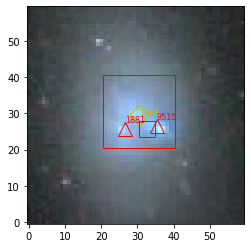

In [5]:
t.one_gal(1881,imsize=60,dssflag=False)

problem accessing image
cutouts/legacy-im-109.40918--22.35183-60.fits
http://legacysurvey.org/viewer/cutout.fits?ra=109.40918&dec=-22.351828&layer=dr8&size=60&pixscale=1.00
trouble in paradise 3959
maybe coords are outside Legacy Survey?
109.40918 -22.351828
using DSS2 image  cutouts/DSS2-109.40918--22.35183-60-1arcsecpix.fits
cutout image size is  60


[3959, 4031]

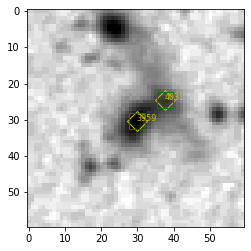

In [6]:
t.one_gal(3959,imsize=60,dssflag=False)

# Downloading Spreadsheet with by-eye Classifications#

spreadsheet is at

https://docs.google.com/spreadsheets/d/1GtvYTBU3tAXI7ngklFWms3WpnGhbzpp3Nn-_VO7sioc/edit?usp=sharing

Download as a xlsx file.  Will get saved in ~/Downloads/

In [8]:
os.chdir('/home/rfinn/research/Virgo/supersample/')
!mv /home/rfinn/Downloads/virgo_check_sample_by_eye.xlsx virgo_check_sample_by_eye.finished.xlsx

# Merging sheets in downloaded spreadsheet #

In [27]:
os.chdir('/home/rfinn/research/Virgo/supersample/')
%run ~/github/Virgo/programs/collate_check_by_eye_results.py

number of objects with class=1 =  8762
number of objects to be removed (class=0, 2, 4) =  834
number of objects with class 0  =  210
number of objects with class 1  =  8762
number of objects with class 2  =  580
number of objects with class 3  =  0
number of objects with class 4  =  44
number of objects with class 5  =  0
number of objects with class 6  =  0
number of objects with class 7  =  508
number of objects with class 8  =  9
number of objects with class 9  =  3
number of objects with class 16  =  20
percent of sample removed = 8.2
DEC > -1 galaxies only
number of objects with class=1 =  6591
number of objects to be removed (class=0, 2, 4) =  705
number of objects with class 0  =  136
number of objects with class 1  =  6591
number of objects with class 2  =  527
number of objects with class 3  =  0
number of objects with class 4  =  42
number of objects with class 5  =  0
number of objects with class 6  =  0
number of objects with class 7  =  304
number of objects with class 8  

The fraction of galaxies removed increased a bit when we added the NSA v0 galaxies.

## Sources to Review with Gianluca (Old)  ##

- we resolved these
- for one galaxy, UGC blah, we actually observed the wrong source in CO

In [11]:
flag = df.df['class']==9
ids = df.df['galnumber'][flag]
print(ids)

6556    6556
8822    8822
9146    9146
Name: galnumber, dtype: int64


Plot postage stamps for these galaxies

In [28]:
os.chdir('/home/rfinn/research/Virgo/supersample/')
%run ~/github/Virgo/programs/mksupersample.py
t = fulltable()

Welcome!

To build catalogs, try: 

 	 s=sample()
 	 s.get_smart() 



To read table and plot images, try: 

 	 t=fulltable()
 	 t.agc_only() )


cutout image size is  60
6556 :  [6556]
cutout image size is  60
8822 :  [8822]
cutout image size is  60
9146 :  [9146]


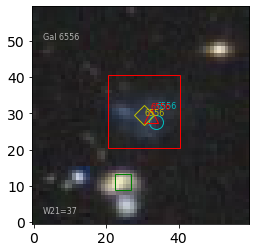

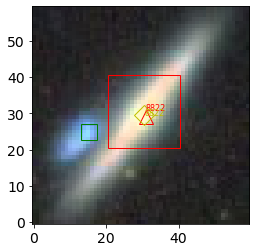

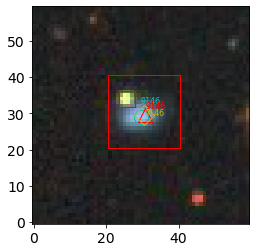

In [22]:
ids = [6556, 8822, 9146]
for i in ids:
    a = t.one_gal(i,imsize=60,dssflag=False)
    print(i,': ',a)

# Cleaning the sample with clean_kitchen_sink.py #

## Applying by-eye classifications to clean the catalog ##

this program will create clean_kitchen_sink.fits 

and
* clean_sample.fits
* clean_sample.txt

The last one is what we upload to IRSA when trying to match to other catalogs (e.g. z0MGS, dust, etc)

## Updating VFID##

- updating clean_kitchen_sink.py to make the VF id a string with all the same number of characters (per Benedetta's suggestion)
- function is add_galid
- assign galaxy ids by declination, from N to S.  this will allow us to have continuous VFID sequence ?




# Replace HL source name for UGC09348

### UGC 09348 ###

- NSA 002473
- http://nsatlas.org/getAtlas.html?search=nsaid&nsaID=2473&submit_form=Submit
- this is in the vf_clean_sample.fits
  - NEDname is NGC 5658 in our table, but this is not the NED name of UGC 9348
- NED link for UGC 09348: https://ned.ipac.caltech.edu/byname?objname=UGC%2009348&hconst=67.8&omegam=0.308&omegav=0.692&wmap=4&corr_z=1
- NED link for NGC 5658: https://ned.ipac.caltech.edu/byname?objname=NGC%205658&hconst=67.8&omegam=0.308&omegav=0.692&wmap=4&corr_z=1

| OBJECT | RA | DEC | Z | AKA |
|--------|----|-----|----|---|
| UGC 09348 | 14h32m28.507s/ 218.118779| +00d17m38.43s/	0.294008 | 1672 | NSA 002473, PGC 051957 |
| NGC 5658 | 14h31m55.288s/	217.980366| -00d22m02.27s/-0.367298 | no z | WISEA J143155.28-002202.4 |

- OK, this one is really odd.  Hyperleda gives the UGC09348 coordinates for NGC5658!
  - http://leda.univ-lyon1.fr/ledacat.cgi?o=NGC%205658
  - hyperleda says the alternate name is UGC09348!  but NED has completely different coordinates for these two.  Which is correct???
  - both surveys agree on UGC09348, so best solution is to change Hyperleda name to UGC 09348

In [17]:
os.chdir('/home/rfinn/research/Virgo/supersample/')
%run ~/github/Virgo/programs/clean_kitchen_sink.py

number of A100-only before cleaning =  46
number of duplicates =  1
AGC-only galaxies with duplicate entries
AGC 
----
5844
	double entry for AGC  8276
	double entry for AGC  7227
	double entry for AGC  223771
	double entry for AGC  5020
	double entry for AGC  5078
	double entry for AGC  5522
	double entry for AGC  5844
	double entry for AGC  5844
	double entry for AGC  5898
	double entry for AGC  6300
	double entry for AGC  7170
	double entry for AGC  7547
	double entry for AGC  9991
	double entry for AGC  202240
	double entry for AGC  211006
	double entry for AGC  213175
	double entry for AGC  213312
	double entry for AGC  214730
	double entry for AGC  220432
	double entry for AGC  220616
	double entry for AGC  220863
	double entry for AGC  220865
	double entry for AGC  222214
	double entry for AGC  222671
	double entry for AGC  224236
	double entry for AGC  226606
	double entry for AGC  229200
	double entry for AGC  232162
	double entry for AGC  233575
	double entry for AGC  238771


## Checking Precision of RA and DEC values ##

- it seems like some of the values were truncated.
- Dustin Lang mentioned this when he matched to unWISE
- want to make sure they are ok

In [18]:
os.chdir('/home/rfinn/research/Virgo/supersample/')
cleancat = fits.getdata('vf_clean_sample.fits')

In [19]:
cleancat['RA']

array([185.86877, 182.208  , 145.94466, ..., 169.26881, 157.98427,
       158.10371], dtype=float32)

In [20]:
cleancat['DEC']

array([ 74.95225 ,  74.904274,  74.85958 , ..., -34.95525 , -34.991207,
       -34.998318], dtype=float32)

RA appears to preserve the significan digits in the table, but not when displayed in topcat.

In [21]:
sum(cleancat['superName'] == 'UGC08656 NOTES01')

1

# Matching to ALFALFA $\alpha$100#

- I'm not exactly sure how this section fits in anymore, but I'm leaving it here in case it's useful down the line...
- we matched to the AGC, but this catalog is not published.  The origin of some of the galaxies are unclear.

In [13]:
os.chdir('/home/rfinn/research/Virgo/supersample/')
%run ~/github/Virgo/programs/mksupersample.py

Welcome!

To build catalogs, try: 

 	 s=sample()
 	 s.get_smart() 
 
 OR
	 s.run_it()


To read table and plot images, try: 

 	 t=fulltable()
 	 t.agc_only() )


In [14]:
t = fulltable()

LENGTH GALIDS_IN_FOV =  9999


cutout image size is  120
6970 :  [6970]
downloading image  cutouts/legacy-im-156.27031-17.16370-120.jpg
downloading image  cutouts/legacy-im-156.27031-17.16370-120.fits
cutout image size is  120
7756 :  [7756, 9629, 9630]
downloading image  cutouts/legacy-im-156.28349-17.15507-120.jpg
downloading image  cutouts/legacy-im-156.28349-17.15507-120.fits
cutout image size is  120
9629 :  [7756, 9629, 9630]


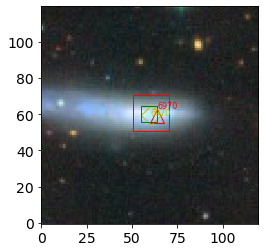

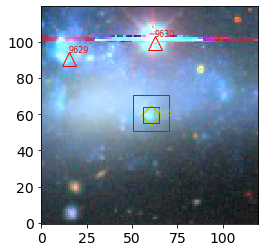

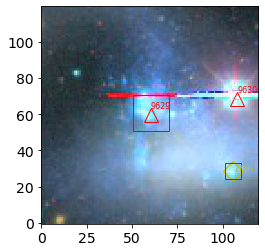

In [18]:
ids = [6970,7756,9629]
for i in ids:
    a = t.one_gal(i,imsize=120,dssflag=False)
    print(i,': ',a)